# Introdução

## Importação das bibliotecas necessarias

In [48]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import ipywidgets as widgets
import glob, os
from itertools import cycle
sns.set()

## Pegar o CSV do Indicador, Estados e Municípios

Aqui é utilizado o indicador "Proporção de nascidos vivos de mulheres com idade inferior a 20 anos (gestação na adolescência)"

In [49]:
csvs = glob.glob(os.path.join('./csv_files/*.csv'))
df_csvs = pd.DataFrame(csvs,columns=['Indicadores'])

In [50]:
indicadores = df_csvs['Indicadores'].map(lambda x: x.lstrip('./csv_files/').rstrip('.csv'))
df_indicadores = pd.DataFrame(indicadores,columns=['Indicadores'])

In [51]:
ano_esc = int( input("Diga ano que deseja visualizar: \n") )

Diga ano que deseja visualizar: 
 2015


In [52]:
indicador_select = widgets.Dropdown(
    options=df_indicadores['Indicadores'].values,
    value='Q-01-proporcao_gravidez_idade_menor_que_20',
    description='Indicadores:',
    disabled=False,
)
display(indicador_select)

Dropdown(description='Indicadores:', index=34, options=('QR-29-taxa_fecundidade_20_34', 'QR-30-taxa_fecundidad…

In [53]:
indicador_select.value
nome_arquivo_indicador = indicador_select.value
arquivo_indicador= df_csvs[df_csvs['Indicadores'].str.contains(indicador_select.value)]['Indicadores'].values[0]
print(arquivo_indicador)

'''
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')
'''

./csv_files/QR-28-taxa_fecundidade_menores_20_multiplicado_por_mil.csv


"\nnome_estado = estados_select.value\nprint(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')\n"

In [54]:
df = pd.read_csv(arquivo_indicador)
df_estados = pd.read_csv('./csv_files/Estados.csv')
df_municipios = pd.read_csv('./csv_files/Municipios.csv')
df

,CODMUNRES,Ano,Qtd_Total,Pop,Ratio
0,110001,2012,76.0,2256,33.687943
1,110001,2013,79.0,2162,36.540241
2,110001,2014,69.0,2065,33.414044
3,110001,2015,74.0,1966,37.639878
4,110001,2016,58.0,1900,30.526316
...,...,...,...,...,...
44555,530010,2015,5679.0,228133,24.893374
44556,530010,2016,5159.0,228268,22.600627
44557,530010,2017,4959.0,227268,21.820054
44558,530010,2018,4734.0,225494,20.993907


In [55]:
coluna_codigo = df.columns[0] 
ano =           df.columns[1] 
indicador =     df.columns[2]
total =         df.columns[3]
ratio =         df.columns[4]
print(coluna_codigo,ano,indicador,total,ratio)

CODMUNRES Ano Qtd_Total Pop Ratio


## Solução do problema de 2019 vazio

In [56]:
aux_municipios = np.array(df.drop_duplicates(subset=[coluna_codigo])[coluna_codigo])
aux_anos = np.array(df.drop_duplicates(subset=[ano])[ano])
aux_anos = np.sort(aux_anos)
 
seq = cycle(aux_anos)
df_join = pd.DataFrame(columns=[coluna_codigo,ano,indicador,total,ratio])
df_join[ano] = [next(seq) for count in range(len(aux_municipios)*len(aux_anos))]

print(df_join.iloc([coluna_codigo],[0]))

for codigo in aux_municipios:
    for i in range(8):
        df_join.iloc([i],[coluna_codigo])=codigo

df_join

SyntaxError: cannot assign to function call (<ipython-input-56-0dd219bb2c63>, line 13)

In [57]:
print(df[df[ano]==2012].shape)
print(df[df[ano]==2013].shape)
print(df[df[ano]==2014].shape)
print(df[df[ano]==2015].shape)
print(df[df[ano]==2016].shape)
print(df[df[ano]==2017].shape)
print(df[df[ano]==2018].shape)
print(df[df[ano]==2019].shape)

(5570, 5)
(5570, 5)
(5570, 5)
(5570, 5)
(5570, 5)
(5570, 5)
(5570, 5)
(5570, 5)


In [58]:
df_municipios[coluna_codigo] = df_municipios[coluna_codigo].astype(str)
f2d = df_municipios[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_municipios['COD_UF'] = f2d.astype(int)
df_municipios

,res_MUNNOME,CODMUNRES,COD_UF
0,Município ignorado - RO,110000,11
1,Alta Floresta D'Oeste,110001,11
2,Ariquemes,110002,11
3,Cabixi,110003,11
4,Cacoal,110004,11
...,...,...,...
5579,Vianópolis,522200,52
5580,Vicentinópolis,522205,52
5581,Vila Boa,522220,52
5582,Vila Propício,522230,52


In [59]:
estados_select = widgets.Dropdown(
    options=df_estados['res_NOME_UF'].values,
    value='MINAS GERAIS',
    description='Estados:',
    disabled=False,
)
display(estados_select)

Dropdown(description='Estados:', index=16, options=('RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA'…

In [60]:
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')

5570 Municípios registrados no país


In [61]:
anos = [2012,2013,2014,2015,2016,2017,2018,2019]
print(anos)

for i in anos:
    aux = df[df[ano]==i]
    aux1 = aux[aux[total]<100]
    print('Ano: ',i,' Municipios com menos de 100 registros no total: ', aux1.shape[0])

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Ano:  2012  Municipios com menos de 100 registros no total:  23
Ano:  2013  Municipios com menos de 100 registros no total:  28
Ano:  2014  Municipios com menos de 100 registros no total:  41
Ano:  2015  Municipios com menos de 100 registros no total:  54
Ano:  2016  Municipios com menos de 100 registros no total:  60
Ano:  2017  Municipios com menos de 100 registros no total:  77
Ano:  2018  Municipios com menos de 100 registros no total:  99
Ano:  2019  Municipios com menos de 100 registros no total:  113


In [62]:
uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]
novo_municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]

municipios_select = widgets.Dropdown(
    options=municipios_uf['res_MUNNOME'].values,
    value=municipios_uf['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

subset_nao_ignorado = df[df[coluna_codigo]%10000 != 0]

df1 = municipios_uf
df2 = subset_nao_ignorado

df1 = df1.astype({coluna_codigo: int})
result = pd.merge(df2, df1 ,on=[coluna_codigo])

uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
result = result[result['COD_UF'] == uf_selecionada]

droped_duplicates = result.drop_duplicates(subset=['res_MUNNOME'])

municipios_select = widgets.Dropdown(
    options=droped_duplicates['res_MUNNOME'].values,
    value=droped_duplicates['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

display(municipios_select)

Dropdown(description='Municipio:', options=('Angra dos Reis', 'Aperibé', 'Araruama', 'Areal', 'Armação dos Búz…

In [63]:
cod_municipio  = municipios_uf[municipios_uf['res_MUNNOME'] == municipios_select.value][coluna_codigo].values[0]
cod_estado = int(str(cod_municipio)[:2])
nome_municipio = municipios_select.value

cod_municipio

'330455'

In [64]:
subset_mun = subset_nao_ignorado[subset_nao_ignorado[coluna_codigo] == int( cod_municipio )]
subset_mun.head(10)

,CODMUNRES,Ano,Qtd_Total,Pop,Ratio
25936,330455,2012,14314.0,462012,30.981879
25937,330455,2013,14360.0,457987,31.354602
25938,330455,2014,14331.0,453325,31.613081
25939,330455,2015,13847.0,447161,30.966475
25940,330455,2016,12382.0,439394,28.179720
25941,330455,2017,11944.0,430441,27.748286
25942,330455,2018,10826.0,421307,25.696226
25943,330455,2019,9482.0,413460,22.933295


In [65]:
nome_indicador = nome_arquivo_indicador.replace('-',' ').replace('_',' ').upper()[3:]
print(nome_indicador)

28 TAXA FECUNDIDADE MENORES 20 MULTIPLICADO POR MIL


## Gráficos por município

### Plot em Stacked Bar do município escolhido considerando os valores absolutos

Aqui são plotadas as barras de Quantidade do Indicador e Quantidade Fora do Indicador, o que permite visualizar os valores absolutos para cada ano no município escolhido.

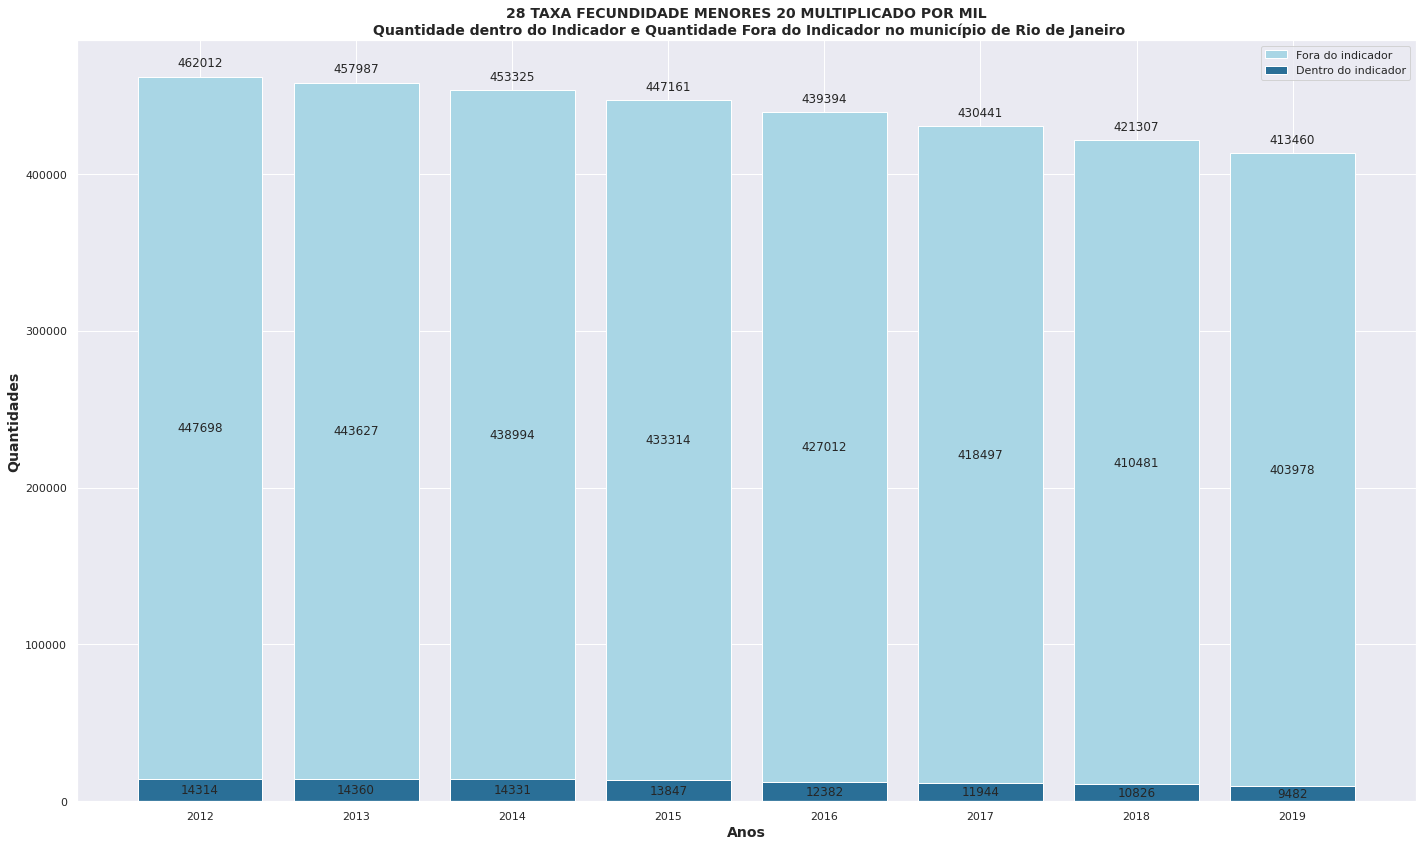

In [66]:
fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], subset_mun[indicador], color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

In [67]:
subset_mun.head()

,CODMUNRES,Ano,Qtd_Total,Pop,Ratio
25936,330455,2012,14314.0,462012,30.981879
25937,330455,2013,14360.0,457987,31.354602
25938,330455,2014,14331.0,453325,31.613081
25939,330455,2015,13847.0,447161,30.966475
25940,330455,2016,12382.0,439394,28.179720


### Plot em Stacked Bar do município escolhido considerando as proporções

Aqui são plotadas as barras de Proporção dentro do Indicador e Proporção Fora do Indicador, o que permite visualizar a proporção para cada ano no município escolhido.

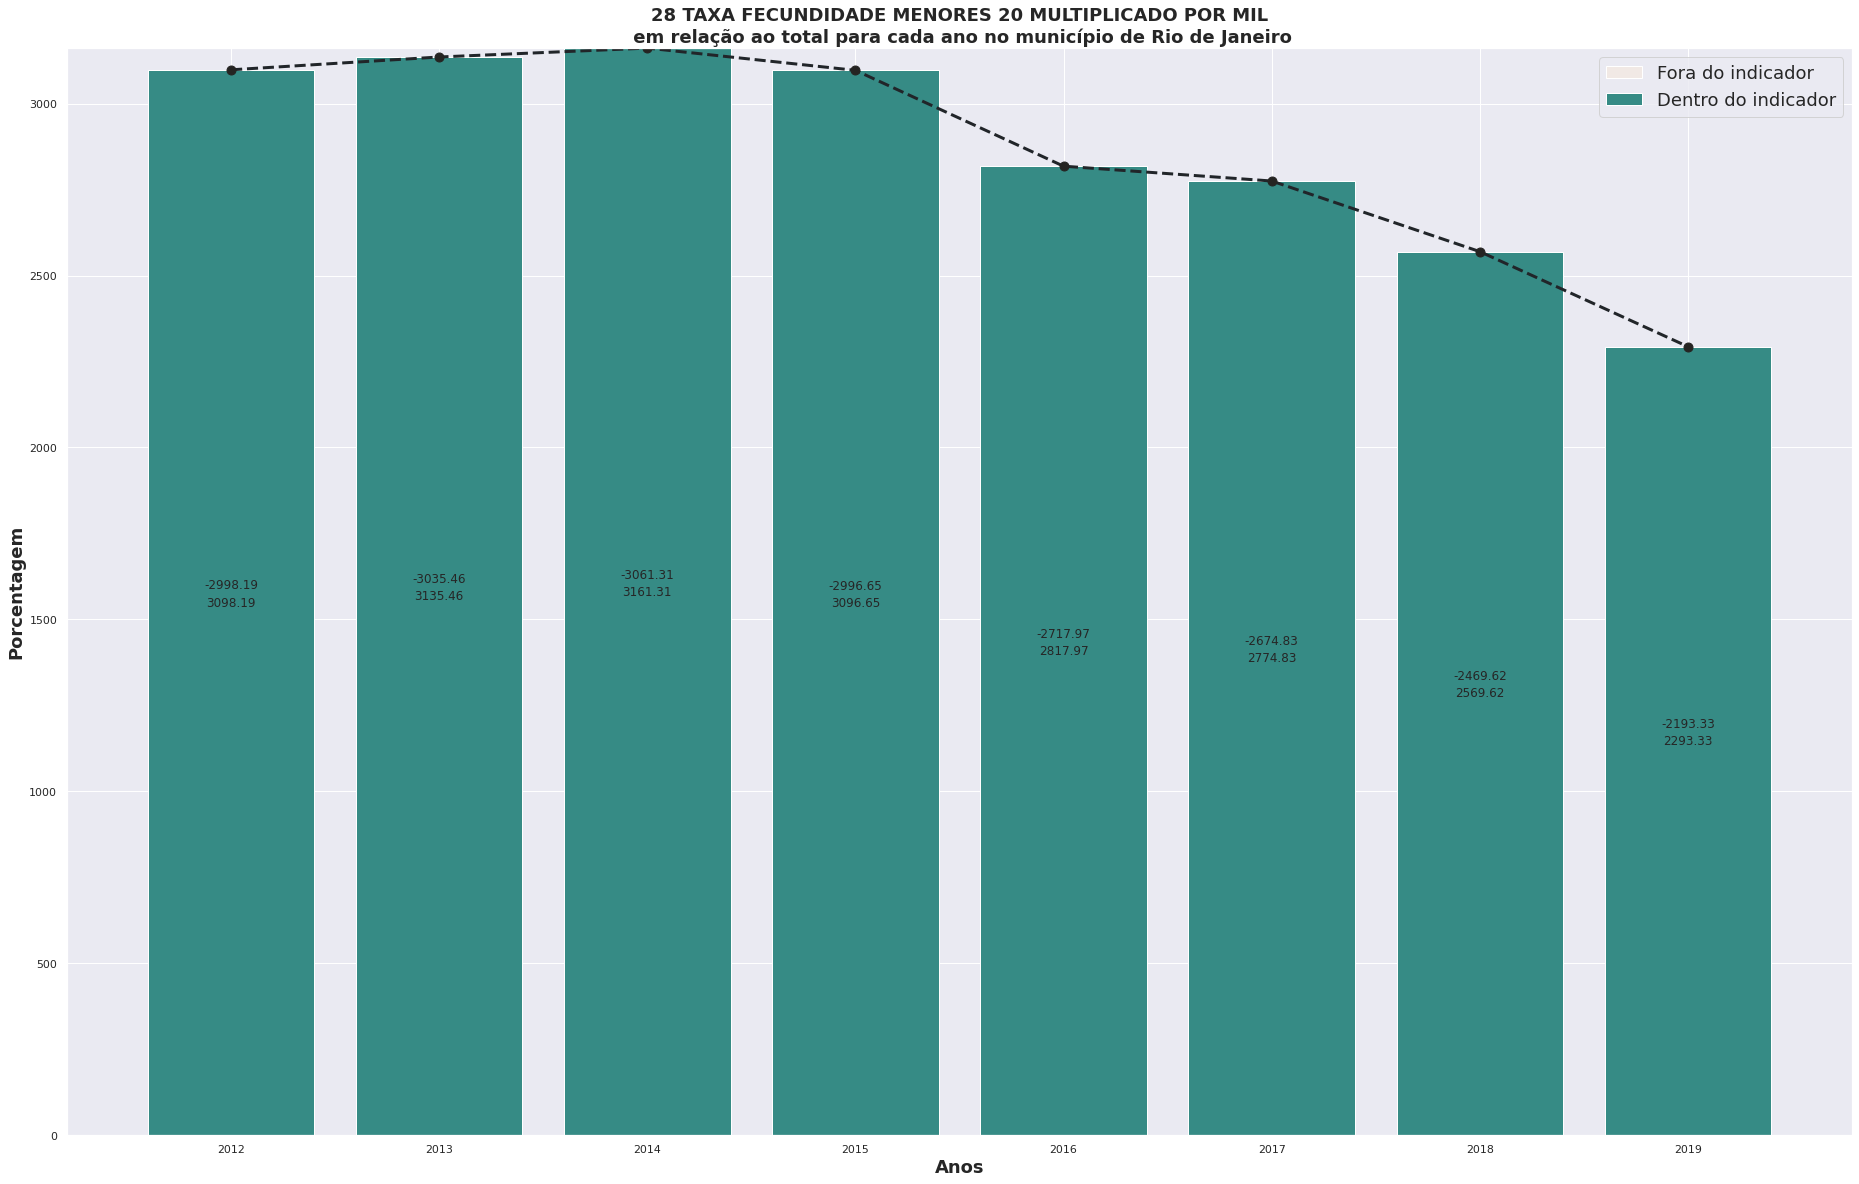

In [68]:
# Falta mostrar dentro desse gráfico a média Estadual, Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(100*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico1', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar do estado que o município escolhido pertence considerando as proporções

Aqui serão calculadas os números acumulados de registros em relação a estado e país para cada ano, para que depois possam ser analisadas as proporções. Essa célula pode ser necessária antes, visto que precisamos mostrar tanto o quartil que o estado se encontra em relação ao país, quanto o quartil que um município em específico de encontra em relação ao estado.

In [69]:
subset_nao_ignorado = subset_nao_ignorado.astype({coluna_codigo: str})
subset_nao_ignorado[ano] =       subset_nao_ignorado[ano].astype(int)
subset_nao_ignorado[indicador] = subset_nao_ignorado[indicador].astype(int)
subset_nao_ignorado[total] =     subset_nao_ignorado[total].astype(int)

f2d = subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_grouped_by_state = subset_nao_ignorado.groupby([f2d, ano], as_index=True).agg({indicador:'sum', total:'sum'})
df_grouped_by_state.reset_index(inplace=True)
df_grouped_by_state.rename(columns = {coluna_codigo:'COD_UF'}, inplace = True)
df_grouped_by_state[ratio] = 1000 * df_grouped_by_state[indicador]/df_grouped_by_state[total]
df_grouped_by_state['COD_UF'] = df_grouped_by_state['COD_UF'].astype(int)

numero_municipios_estado = int(droped_duplicates['res_MUNNOME'].shape[0])

df_estado_acumulado = df_grouped_by_state[df_grouped_by_state['COD_UF']==cod_estado]

print(numero_municipios_estado, 'Municípios com mais de 100 registros no estado',nome_estado,'para o indicador',nome_indicador,'\n')
print(df_estado_acumulado)

92 Municípios com mais de 100 registros no estado RIO DE JANEIRO para o indicador 28 TAXA FECUNDIDADE MENORES 20 MULTIPLICADO POR MIL 

     COD_UF   Ano  Qtd_Total      Pop      Ratio
144      33  2012      40876  1266821  32.266595
145      33  2013      41276  1250006  33.020642
146      33  2014      41793  1231618  33.933411
147      33  2015      40702  1209200  33.660271
148      33  2016      36371  1182534  30.756832
149      33  2017      35235  1152661  30.568398
150      33  2018      32279  1122401  28.758884
151      33  2019      28809  1095502  26.297533


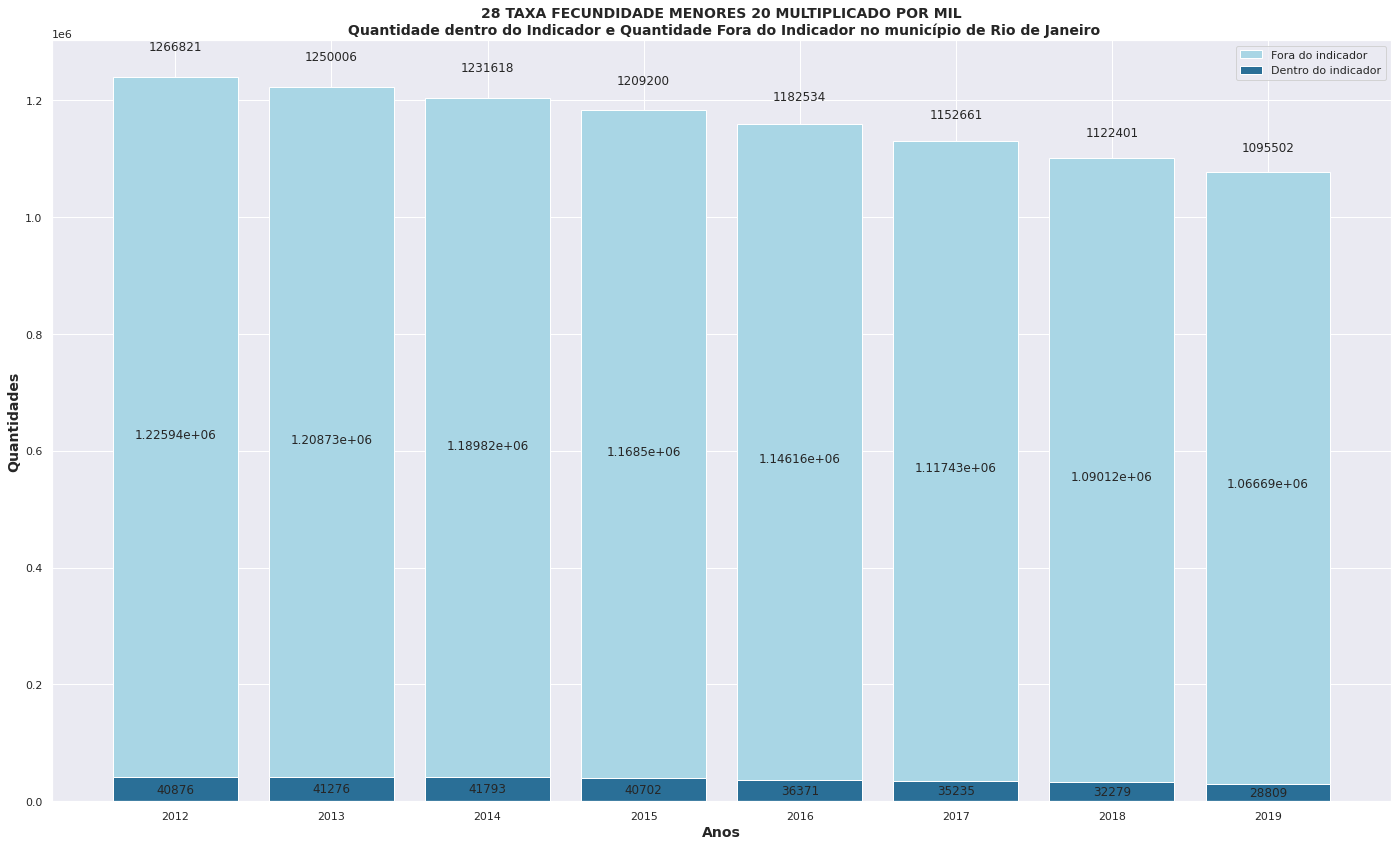

In [70]:
fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( df_estado_acumulado[ano], df_estado_acumulado[total] - df_estado_acumulado[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( df_estado_acumulado[ano], df_estado_acumulado[indicador], color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

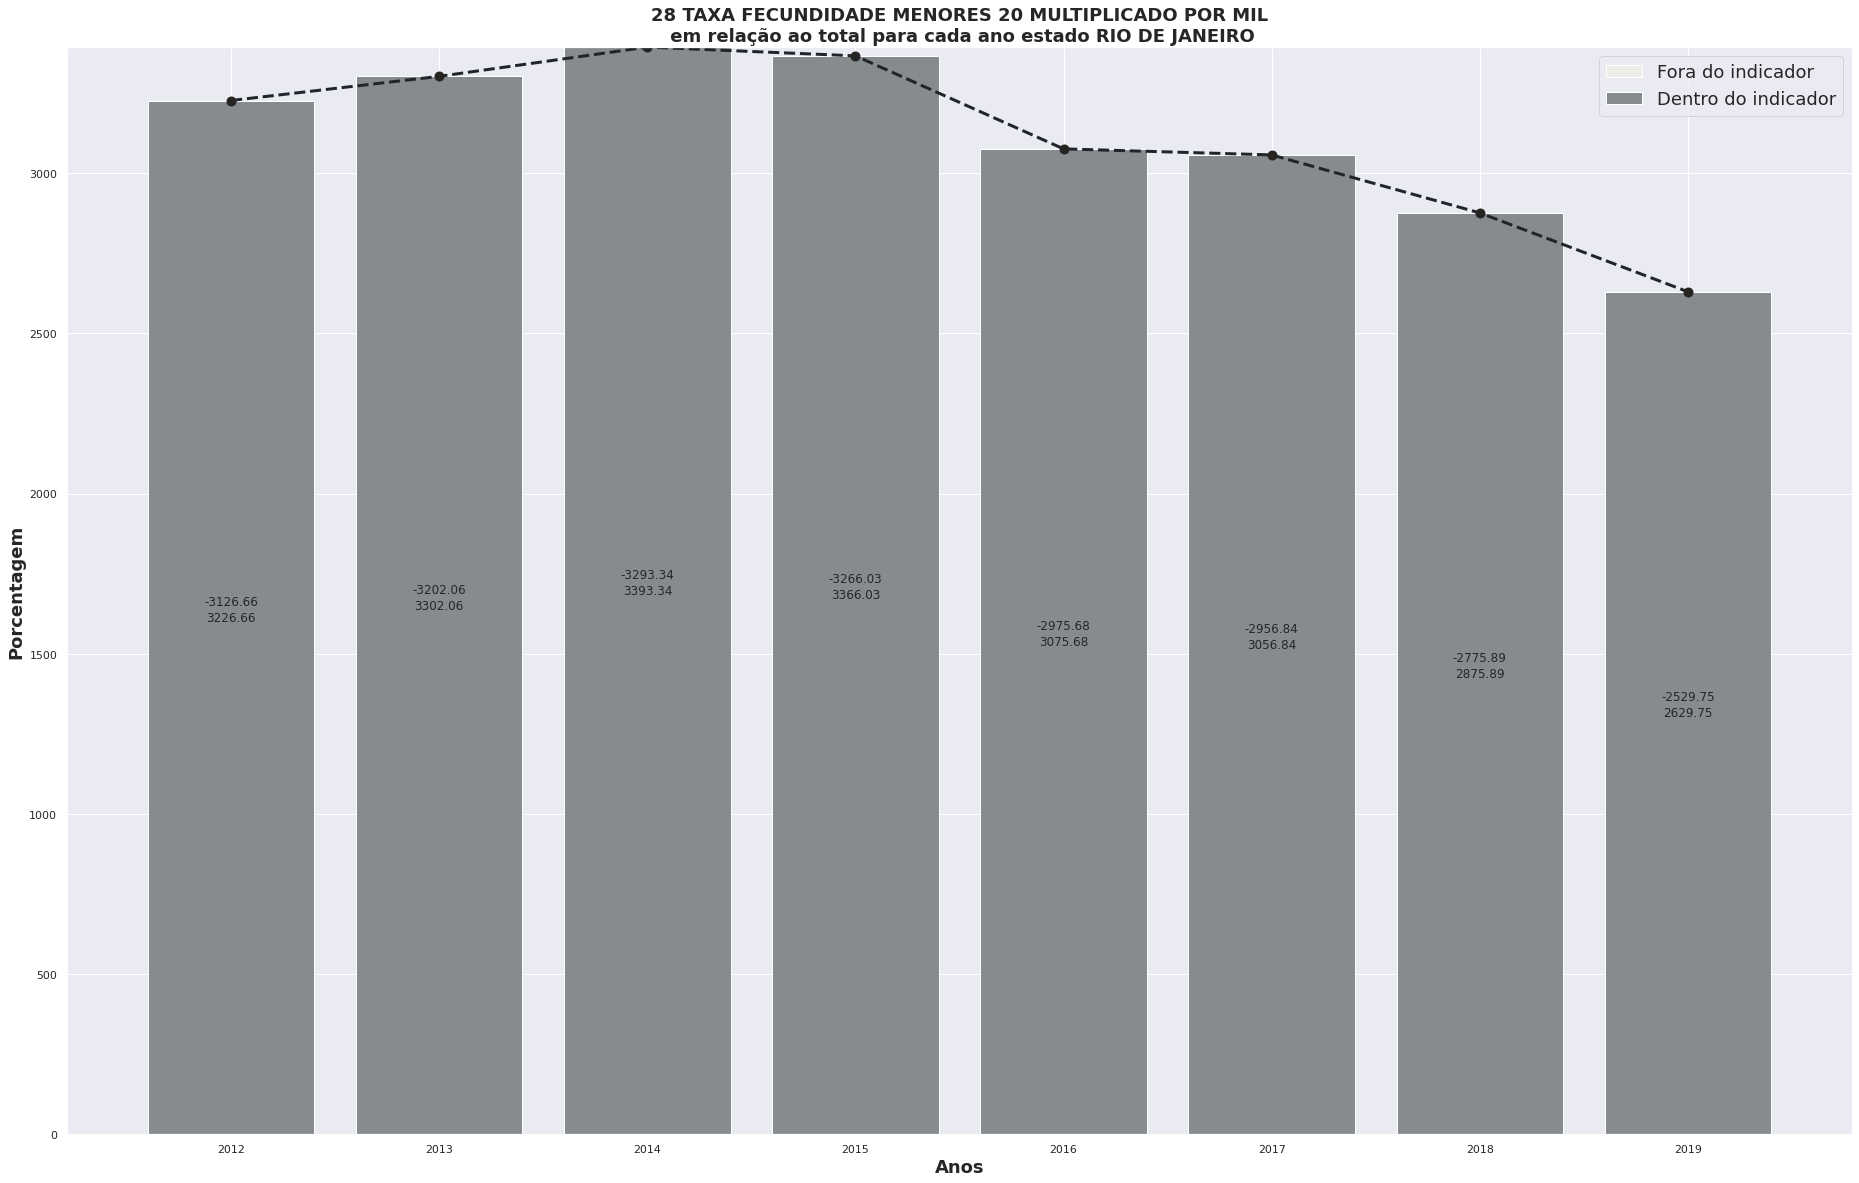

In [71]:
# Falta mostrar dentro desse gráfico a média Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_estado_acumulado[ano],  np.round(100 - 100*df_estado_acumulado[ratio], decimals=2) , bottom= np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#EEEDE7', label = 'Fora do indicador')
p2 = ax.bar(df_estado_acumulado[ano],  np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#868B8E', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano estado " + nome_estado, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico2', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar da região que o município escolhido pertence considerando as proporções

In [72]:
norte =         subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '1') ]
nordeste =      subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '2') ]
sudeste =       subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '3') ]
sul =           subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '4') ]
centro_oeste =  subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '5') ]

print(sudeste)
sudeste.to_csv('./csv_files/37-sudeste.csv',index=False)

      CODMUNRES   Ano  Qtd_Total  Pop      Ratio
17952    310010  2012         11  512  21.484375
17953    310010  2013         11  500  22.000000
17954    310010  2014          8  490  16.326531
17955    310010  2015          9  475  18.947368
17956    310010  2016         11  462  23.809524
...         ...   ...        ...  ...        ...
31291    355715  2015          6  166  36.144578
31292    355715  2016          5  165  30.303030
31293    355715  2017          5  163  30.674847
31294    355715  2018          9  162  55.555556
31295    355715  2019          5  160  31.250000

[13344 rows x 5 columns]


In [73]:
def acumula(dataframe):
    anos = np.array(dataframe[ano][:8]).astype(int)

    soma_anos_total = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_total[i] = dataframe.loc[dataframe[ano]==anos[i], total ].sum()

    soma_anos_indicador = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador[i] = dataframe.loc[dataframe[ano]==anos[i], indicador ].sum()

    list_of_tuples = list(zip(anos,soma_anos_indicador, soma_anos_total, 1000 * np.round(soma_anos_indicador/soma_anos_total,decimals=8)))
    acumulado = pd.DataFrame(list_of_tuples,columns=[ano,indicador,total,ratio])
    
    return acumulado

In [74]:
norte_acumulado = acumula(norte)
#norte_acumulado.insert(loc=0,column='CODREGIAO',value=[1,1,1,1,1,1,1,1])
norte_acumulado.insert(loc=0,column='NOMEREGIAO',value='Norte')

nordeste_acumulado = acumula(nordeste)
#nordeste_acumulado.insert(loc=0,column='CODREGIAO',value=[2,2,2,2,2,2,2,2])
nordeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Nordeste')

sudeste_acumulado = acumula(sudeste)
#sudeste_acumulado.insert(loc=0,column='CODREGIAO',value=[3,3,3,3,3,3,3,3])
sudeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sudeste')


sul_acumulado = acumula(sul)
#sul_acumulado.insert(loc=0,column='CODREGIAO',value=[4,4,4,4,4,4,4,4])
sul_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sul')


centro_oeste_acumulado = acumula(centro_oeste)
#centro_oeste_acumulado.insert(loc=0,column='CODREGIAO',value=[5,5,5,5,5,5,5,5])
centro_oeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Centro Oeste')


print(sudeste_acumulado)
print('\n',sul_acumulado)
print('\n',centro_oeste_acumulado)
print('\n',nordeste_acumulado)
print('\n',norte_acumulado)

  NOMEREGIAO   Ano  Qtd_Total      Pop     Ratio
0    Sudeste  2012     184238  6504547  28.32449
1    Sudeste  2013     184721  6433201  28.71370
2    Sudeste  2014     185639  6355697  29.20828
3    Sudeste  2015     179327  6267658  28.61148
4    Sudeste  2016     161337  6163954  26.17427
5    Sudeste  2017     153526  6042982  25.40567
6    Sudeste  2018     141836  5920966  23.95487
7    Sudeste  2019     128142  5810523  22.05344

   NOMEREGIAO   Ano  Qtd_Total      Pop     Ratio
0        Sul  2012      65266  2263315  28.83646
1        Sul  2013      65678  2221453  29.56533
2        Sul  2014      65127  2179396  29.88305
3        Sul  2015      62565  2139199  29.24693
4        Sul  2016      56241  2095957  26.83309
5        Sul  2017      52173  2046106  25.49868
6        Sul  2018      48255  1996525  24.16949
7        Sul  2019      43964  1952804  22.51327

      NOMEREGIAO   Ano  Qtd_Total      Pop     Ratio
0  Centro Oeste  2012      44025  1250577  35.20375
1  Centro 

In [75]:
df_brasil_regiao = norte_acumulado.append(nordeste_acumulado).append(sudeste_acumulado).append(sul_acumulado).append(centro_oeste_acumulado)
df_brasil_regiao

,NOMEREGIAO,Ano,Qtd_Total,Pop,Ratio
0,Norte,2012,81893,1718754,47.64673
1,Norte,2013,82998,1719492,48.26891
2,Norte,2014,84368,1717856,49.11238
3,Norte,2015,82092,1713294,47.91472
4,Norte,2016,76184,1708137,44.60064
5,Norte,2017,74096,1699208,43.60620
6,Norte,2018,73211,1688590,43.35629
7,Norte,2019,69397,1677039,41.38067
0,Nordeste,2012,184696,5120221,36.07188
1,Nordeste,2013,182094,5069630,35.91860


In [76]:
cod_aux = str(subset_mun[coluna_codigo].iloc[0])[:1]

if (cod_aux == '1'):
    nome_regiao = 'Norte'
    regiao = norte
    regiao_acumulada = norte_acumulado
elif (cod_aux == '2'):
    nome_regiao = 'Nordeste'
    regiao = nordeste
    regiao_acumulada = nordeste_acumulado
elif (cod_aux == '3'):
    nome_regiao = 'Sudeste'
    regiao = sudeste
    regiao_acumulada = sudeste_acumulado
elif (cod_aux == '4'):
    nome_regiao = 'Sul'
    regiao = sul
    regiao_acumulada = sul_acumulado
elif (cod_aux == '5'):
    nome_regiao = 'Centro Oeste'
    regiao = centro_oeste
    regiao_acumulada = centro_oeste_acumulado
    
print(nome_regiao)
print(regiao)

Sudeste
      CODMUNRES   Ano  Qtd_Total  Pop      Ratio
17952    310010  2012         11  512  21.484375
17953    310010  2013         11  500  22.000000
17954    310010  2014          8  490  16.326531
17955    310010  2015          9  475  18.947368
17956    310010  2016         11  462  23.809524
...         ...   ...        ...  ...        ...
31291    355715  2015          6  166  36.144578
31292    355715  2016          5  165  30.303030
31293    355715  2017          5  163  30.674847
31294    355715  2018          9  162  55.555556
31295    355715  2019          5  160  31.250000

[13344 rows x 5 columns]


In [77]:
regiao_acumulada[ano]

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
Name: Ano, dtype: int64

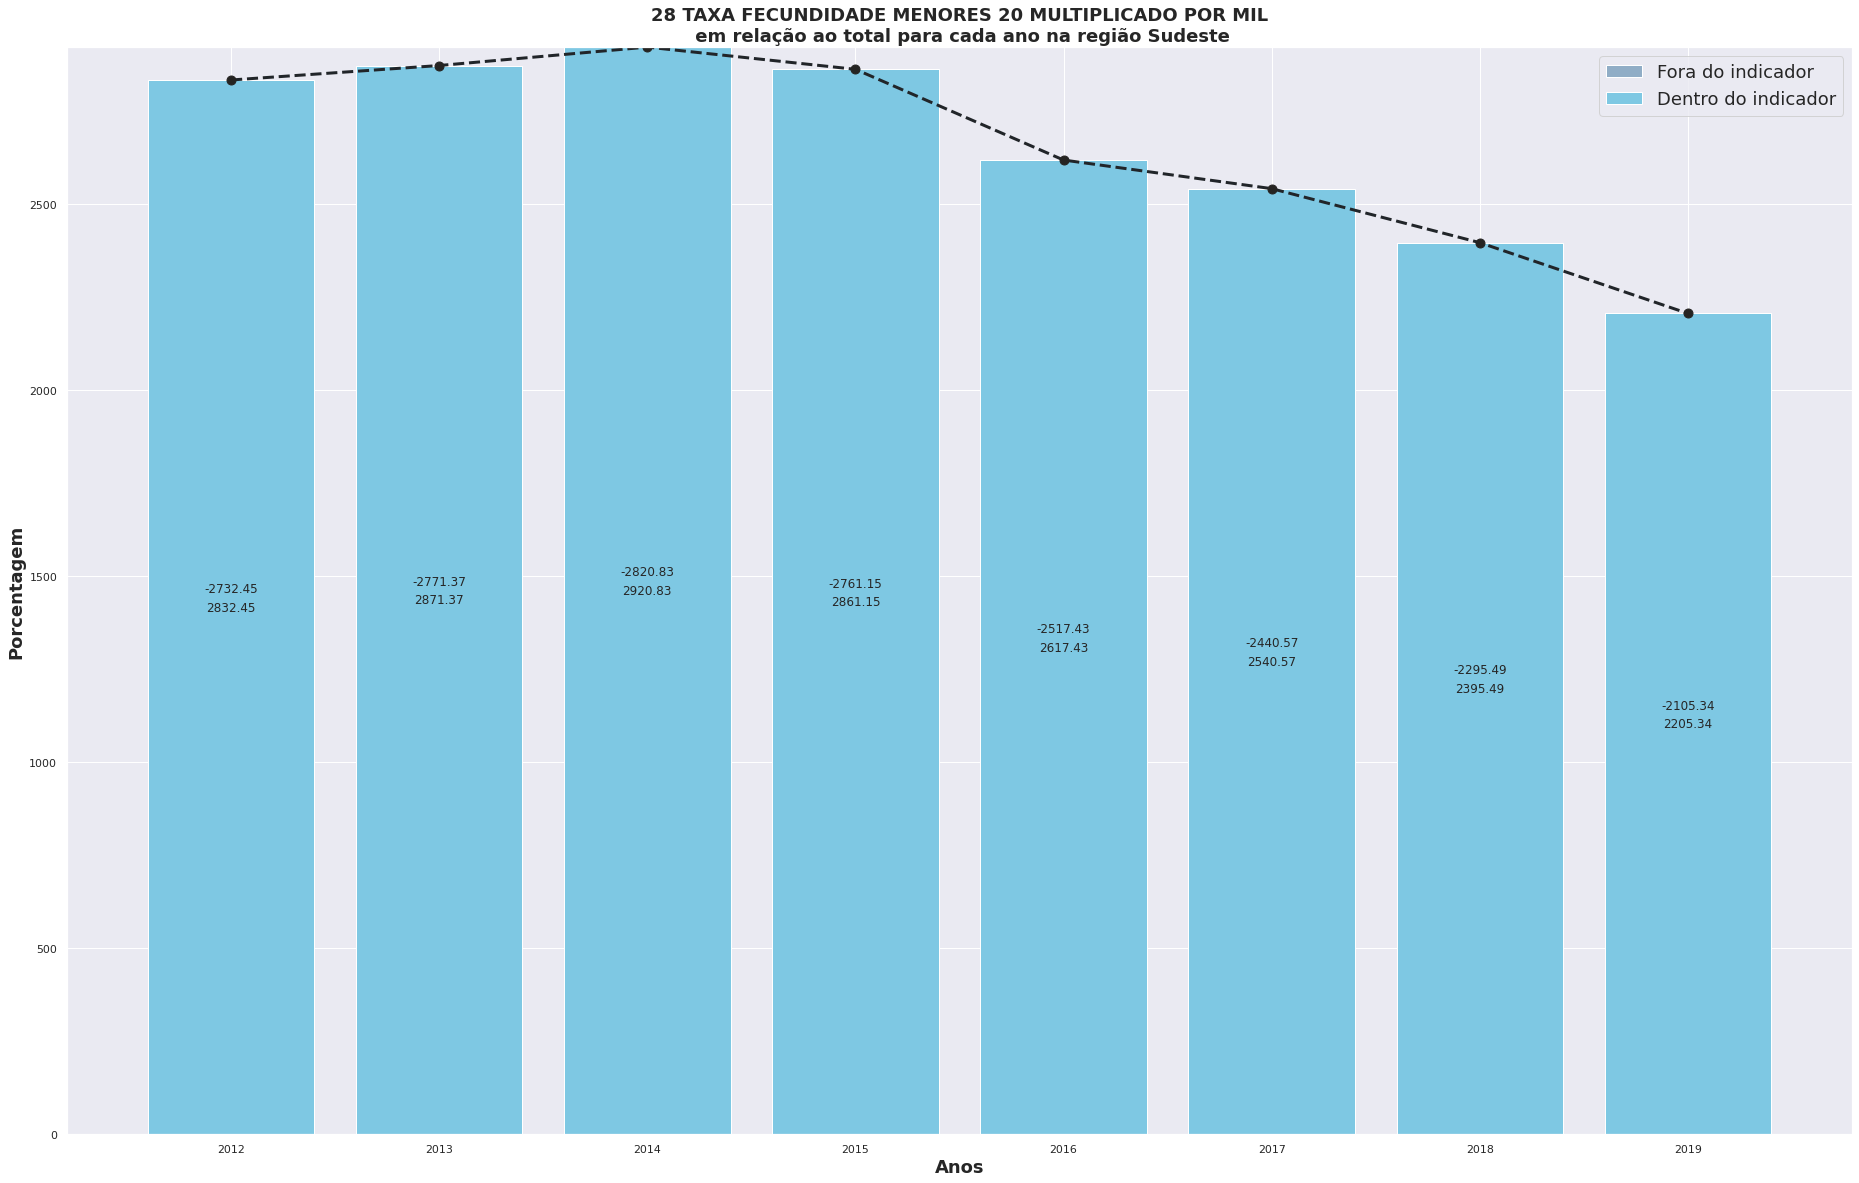

In [78]:
# Falta mostrar dentro desse gráfico a média Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(regiao_acumulada[ano],  np.round(100 - 100*regiao_acumulada[ratio], decimals=2) , bottom= np.round(100*regiao_acumulada[ratio], decimals=2), color ='#90ADC6', label = 'Fora do indicador')
p2 = ax.bar(regiao_acumulada[ano],  np.round(100*regiao_acumulada[ratio], decimals=2), color ='#7EC8E3', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano na região " + nome_regiao, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico3', bbox_inches='tight')
plt.show()

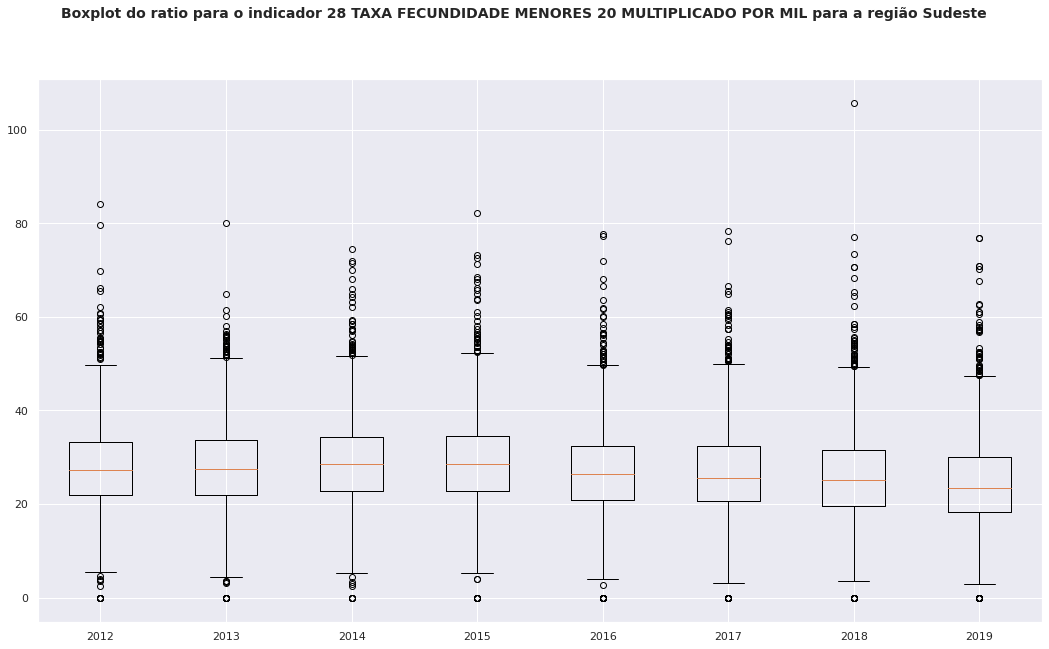

In [79]:
data_to_plot = [regiao[regiao[ano]==2012][ratio], regiao[regiao[ano]==2013][ratio],
                regiao[regiao[ano]==2014][ratio], regiao[regiao[ano]==2015][ratio],
                regiao[regiao[ano]==2016][ratio], regiao[regiao[ano]==2017][ratio],
                regiao[regiao[ano]==2018][ratio], regiao[regiao[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para a região ' + nome_regiao , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

## Gráficos por estado 

### Cálculo do acumulado para cada estado e país

In [80]:
# Dataframe dos municipios do estado escolhido
df_estado_municipios = subset_nao_ignorado.loc[ subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False) == str(cod_estado) ] 
print(df_estado_municipios)

      CODMUNRES   Ano  Qtd_Total    Pop      Ratio
25400    330010  2012        553  15512  35.649819
25401    330010  2013        523  15546  33.642094
25402    330010  2014        557  15570  35.773924
25403    330010  2015        507  15549  32.606598
25404    330010  2016        490  15273  32.082760
...         ...   ...        ...    ...        ...
26131    330630  2015        489  17559  27.848966
26132    330630  2016        442  17138  25.790641
26133    330630  2017        388  16728  23.194644
26134    330630  2018        394  16256  24.237205
26135    330630  2019        298  15833  18.821449

[736 rows x 5 columns]


In [81]:
df_brasil_acumulado = acumula(subset_nao_ignorado)
print(df_brasil_acumulado)

    Ano  Qtd_Total       Pop     Ratio
0  2012     560118  16857414  33.22680
1  2013     559959  16688060  33.55447
2  2014     562581  16502216  34.09124
3  2015     547533  16299383  33.59225
4  2016     501356  16069124  31.19996
5  2017     480900  15790979  30.45410
6  2018     456099  15505877  29.41459
7  2019     419232  15238054  27.51217


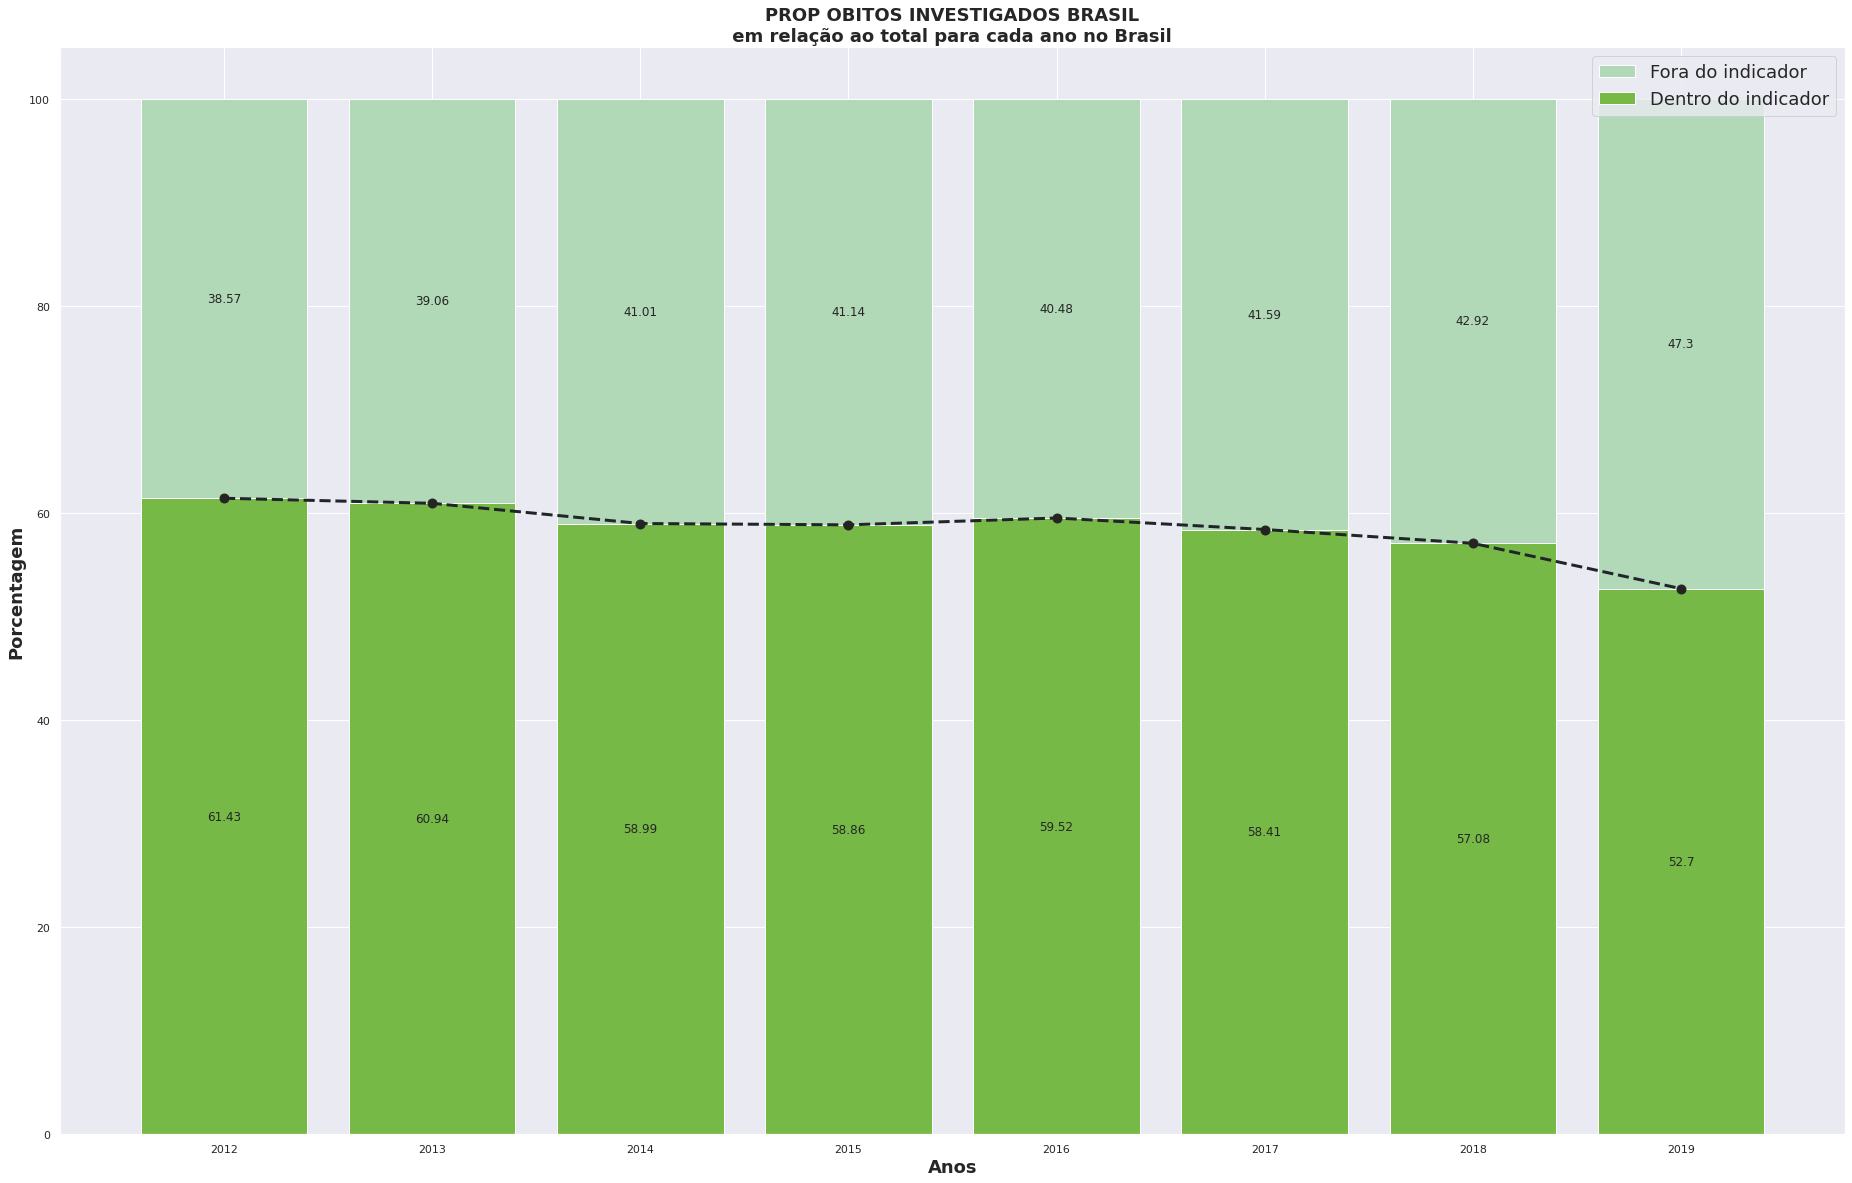

In [293]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_brasil_acumulado[ano],  np.round(100 - 100*df_brasil_acumulado[ratio], decimals=2) , bottom= np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#B1D8B7', label = 'Fora do indicador')
p2 = ax.bar(df_brasil_acumulado[ano],  np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#76B947', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no Brasil ", **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico4', bbox_inches='tight')
plt.show()

In [294]:
df_brasil_por_estado = df_grouped_by_state
print(df_brasil_por_estado)

     COD_UF   Ano  Qtd_Obitos_Investigados  Qtd_Total     Ratio
0        11  2012                      265        578  0.458478
1        11  2013                      260        551  0.471869
2        11  2014                      268        540  0.496296
3        11  2015                      332        561  0.591800
4        11  2016                      269        533  0.504690
..      ...   ...                      ...        ...       ...
211      53  2015                      519        760  0.682895
212      53  2016                      660        817  0.807834
213      53  2017                      603        702  0.858974
214      53  2018                      710        773  0.918499
215      53  2019                      654        712  0.918539

[216 rows x 5 columns]


### Gráfico do município mostrando também as médias Brasil Estadual e Regional para cada ano

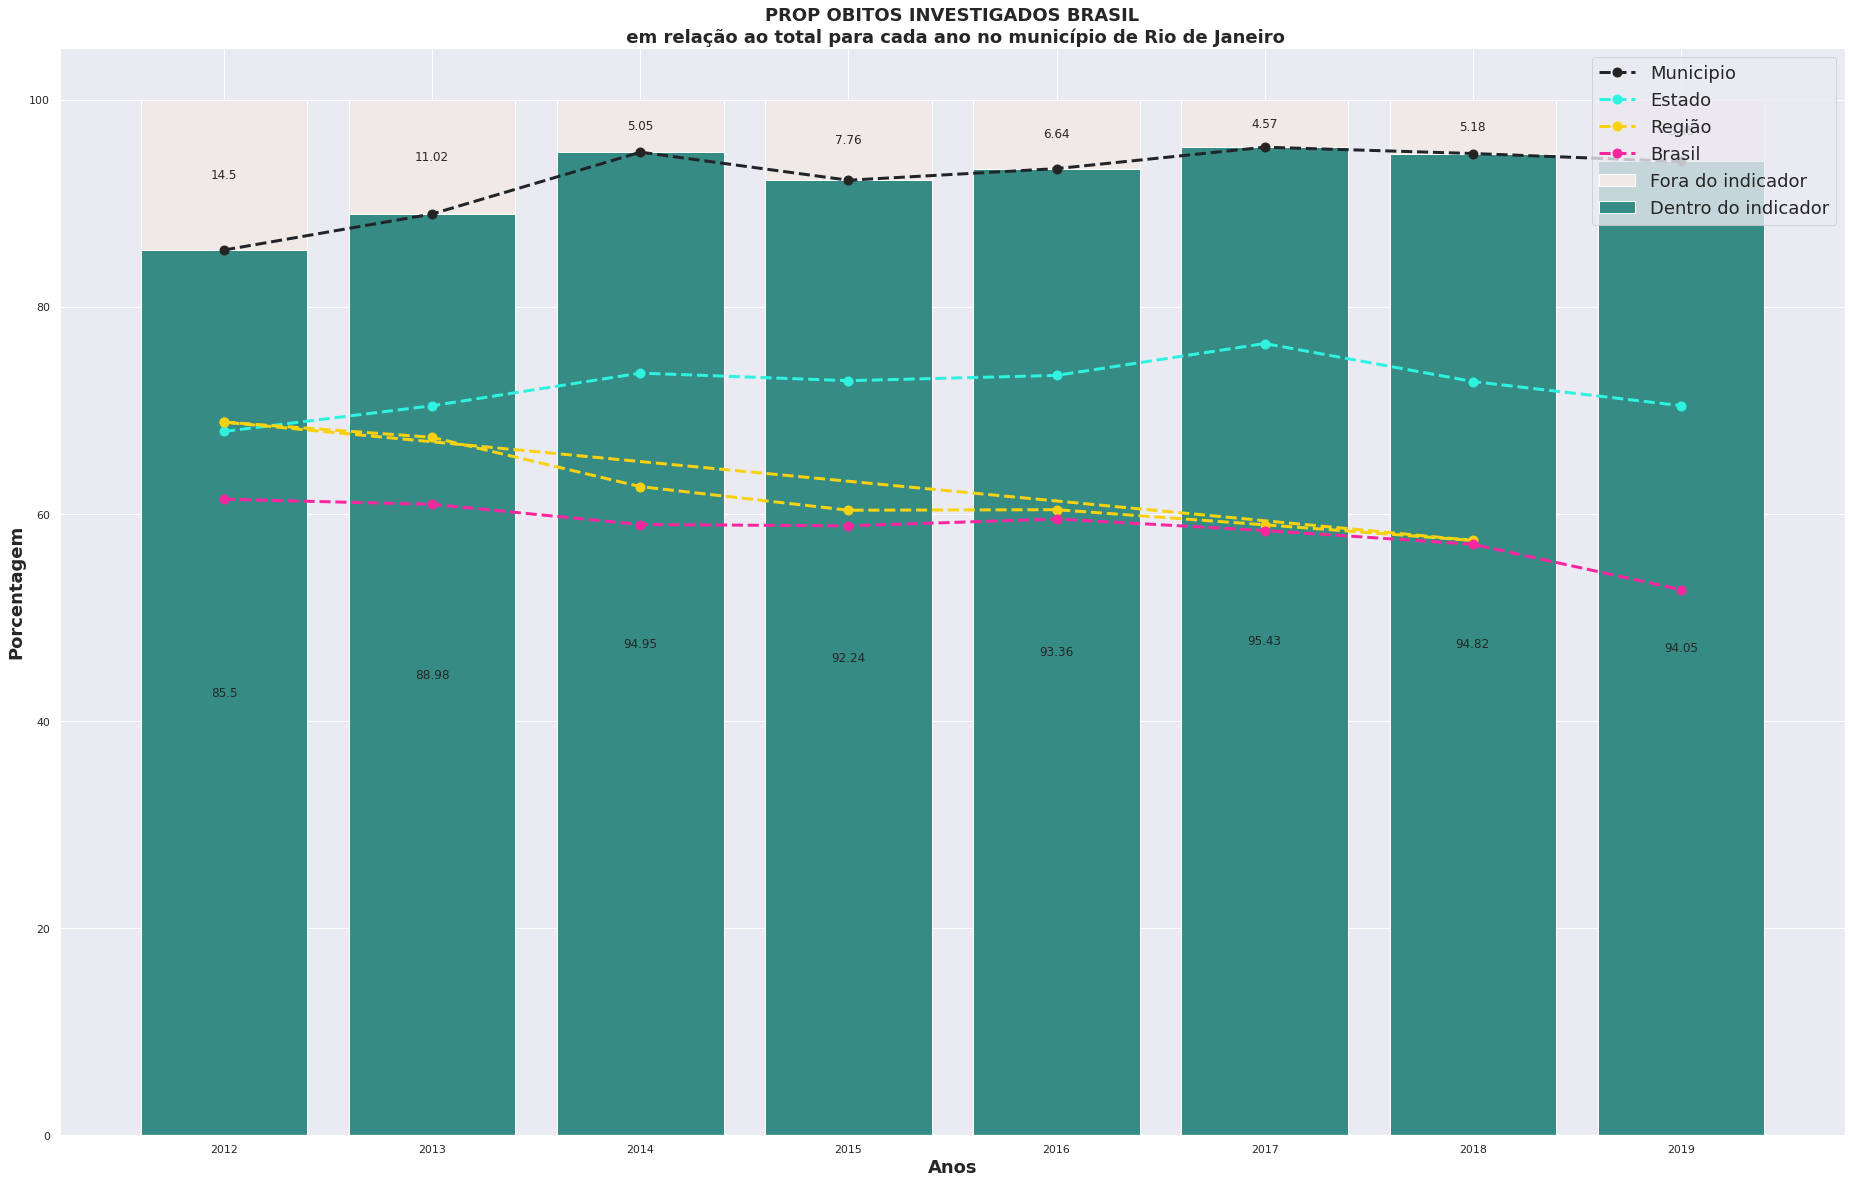

In [295]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(100*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico5', bbox_inches='tight')
plt.show()

### Boxplot de todos os municípios de um estado em cada ano, lado a lado

Escolhemos um indicador, então um gráfico contendo os boxplot de cada ano é gerado para um estado em específico, nesse gráfico também está contida a informação de qual é a média mediana do estado. Além de indicar em qual quartil o estado se encontra em relação ao país (vale revisar se essa informação deveria estar aqui)

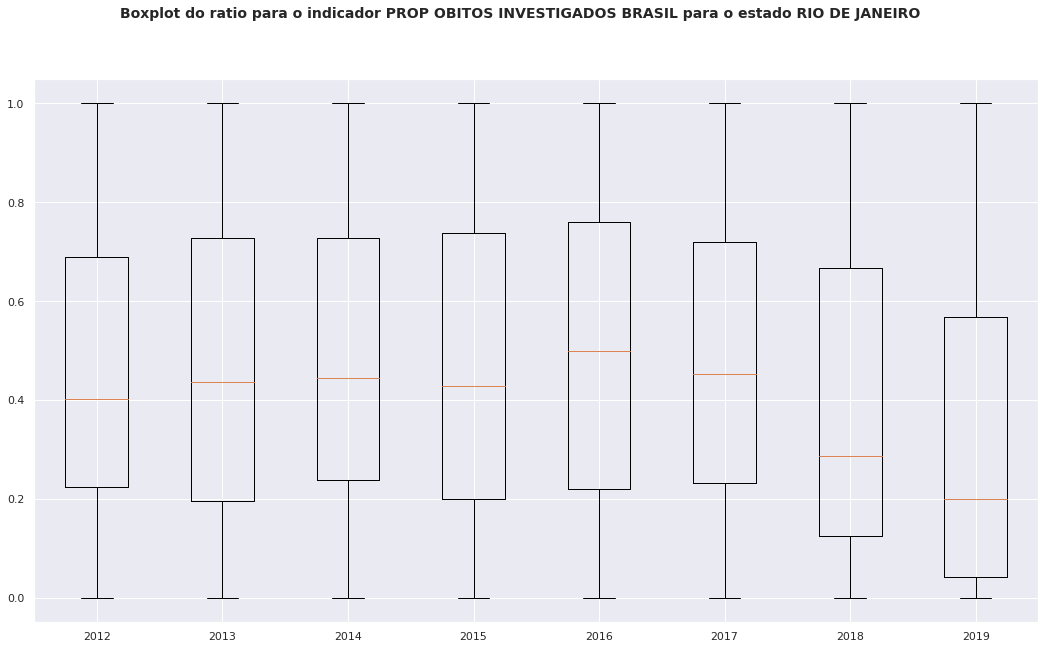

In [296]:
data_to_plot = [df_estado_municipios[df_estado_municipios[ano]==2012][ratio], df_estado_municipios[df_estado_municipios[ano]==2013][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2014][ratio], df_estado_municipios[df_estado_municipios[ano]==2015][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2016][ratio], df_estado_municipios[df_estado_municipios[ano]==2017][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2018][ratio], df_estado_municipios[df_estado_municipios[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para o estado ' + nome_estado , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

### Gráfico em barras do acumulado de cada estado em um ano, com cada estado lado a lado

In [297]:
subset_ano = subset_nao_ignorado[ subset_nao_ignorado[ano] == ano_esc ]
subset_ano.head()

,CODMUNRES,Ano,Qtd_Obitos_Investigados,Qtd_Total,Ratio
10,110001,2016,2,8,0.250000
18,110002,2016,23,35,0.657143
26,110003,2016,2,3,0.666667
34,110004,2016,25,31,0.806452
42,110005,2016,3,7,0.428571


In [298]:
df_brasil_por_estado
df_brasil_por_estado_e_ano = df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]
df_brasil_por_estado_e_ano.head(10)

,COD_UF,Ano,Qtd_Obitos_Investigados,Qtd_Total,Ratio
4,11,2016,269,533,0.504690
12,12,2016,135,243,0.555556
20,13,2016,709,1245,0.569478
28,14,2016,80,168,0.476190
36,15,2016,1408,2608,0.539877
44,16,2016,46,234,0.196581
52,17,2016,326,467,0.698073
60,21,2016,669,2290,0.292140
68,22,2016,288,1003,0.287139
76,23,2016,2360,2694,0.876021


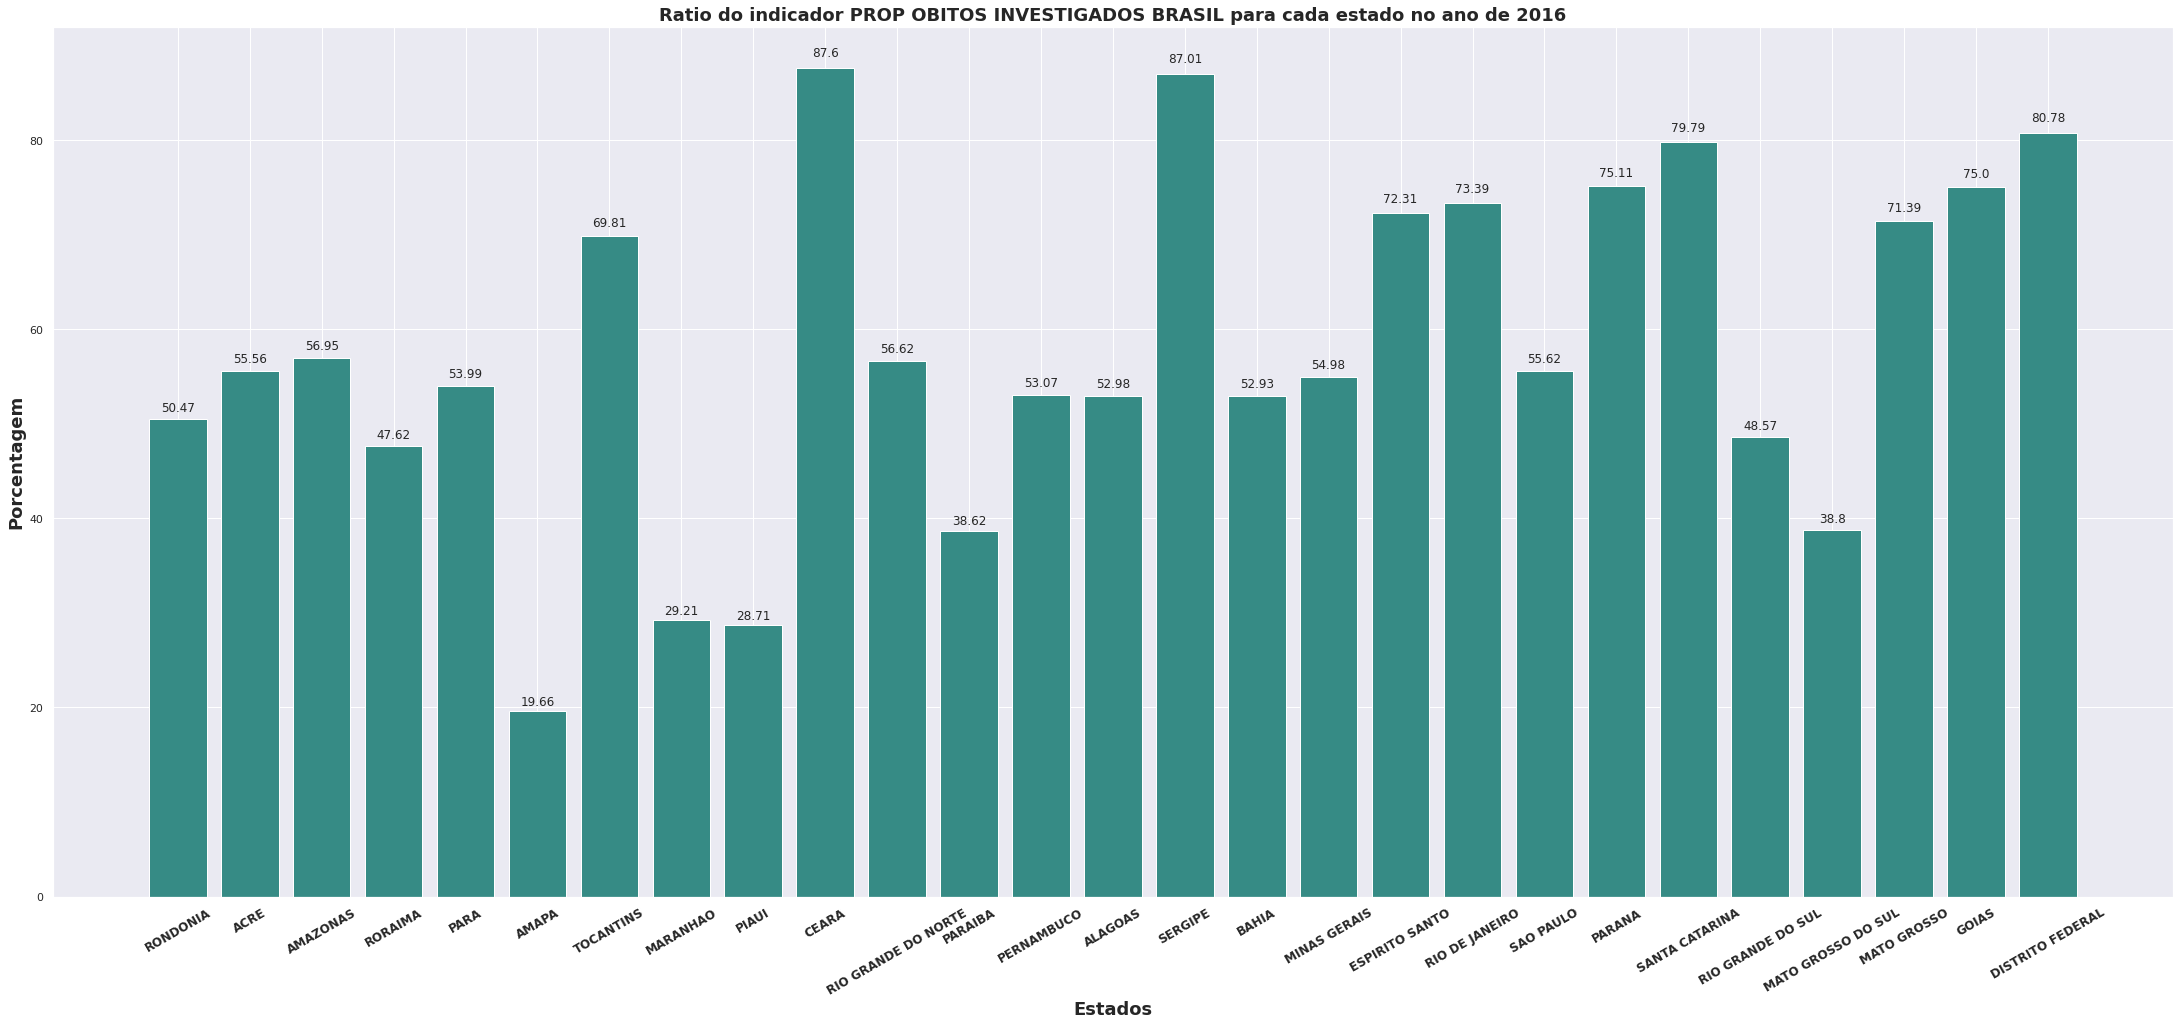

In [299]:
estados = df_estados['res_NOME_UF'].values

plt.figure(figsize=(38, 16))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 12}


plt.title("Ratio do indicador " + nome_indicador +" para cada estado no ano de " + str(ano_esc),**font)
plt.xlabel('Estados',**font)
plt.ylabel('Porcentagem',**font)


#plt.bar(df_brasil_por_estado['COD_UF'],100*df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]['ratio'], color ='#3458FF') #TODO
#plt.show()
estado_ = df_estados["res_NOME_UF"].values
merge1 = pd.merge(df_brasil_por_estado_e_ano, df_estados ,on=["COD_UF"])
#print(merge1.head(27))
y_pos = range(27)
grafico = plt.bar(merge1['res_NOME_UF'],100*merge1[ratio] , color ='#368B85')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, merge1['res_NOME_UF'], rotation=30,**font_label)

plt.savefig('./Imagens/10-grafico6', bbox_inches='tight')
plt.show()

### Gerar um gráfico semelhante ao acima, porém com as regiões lado a lado

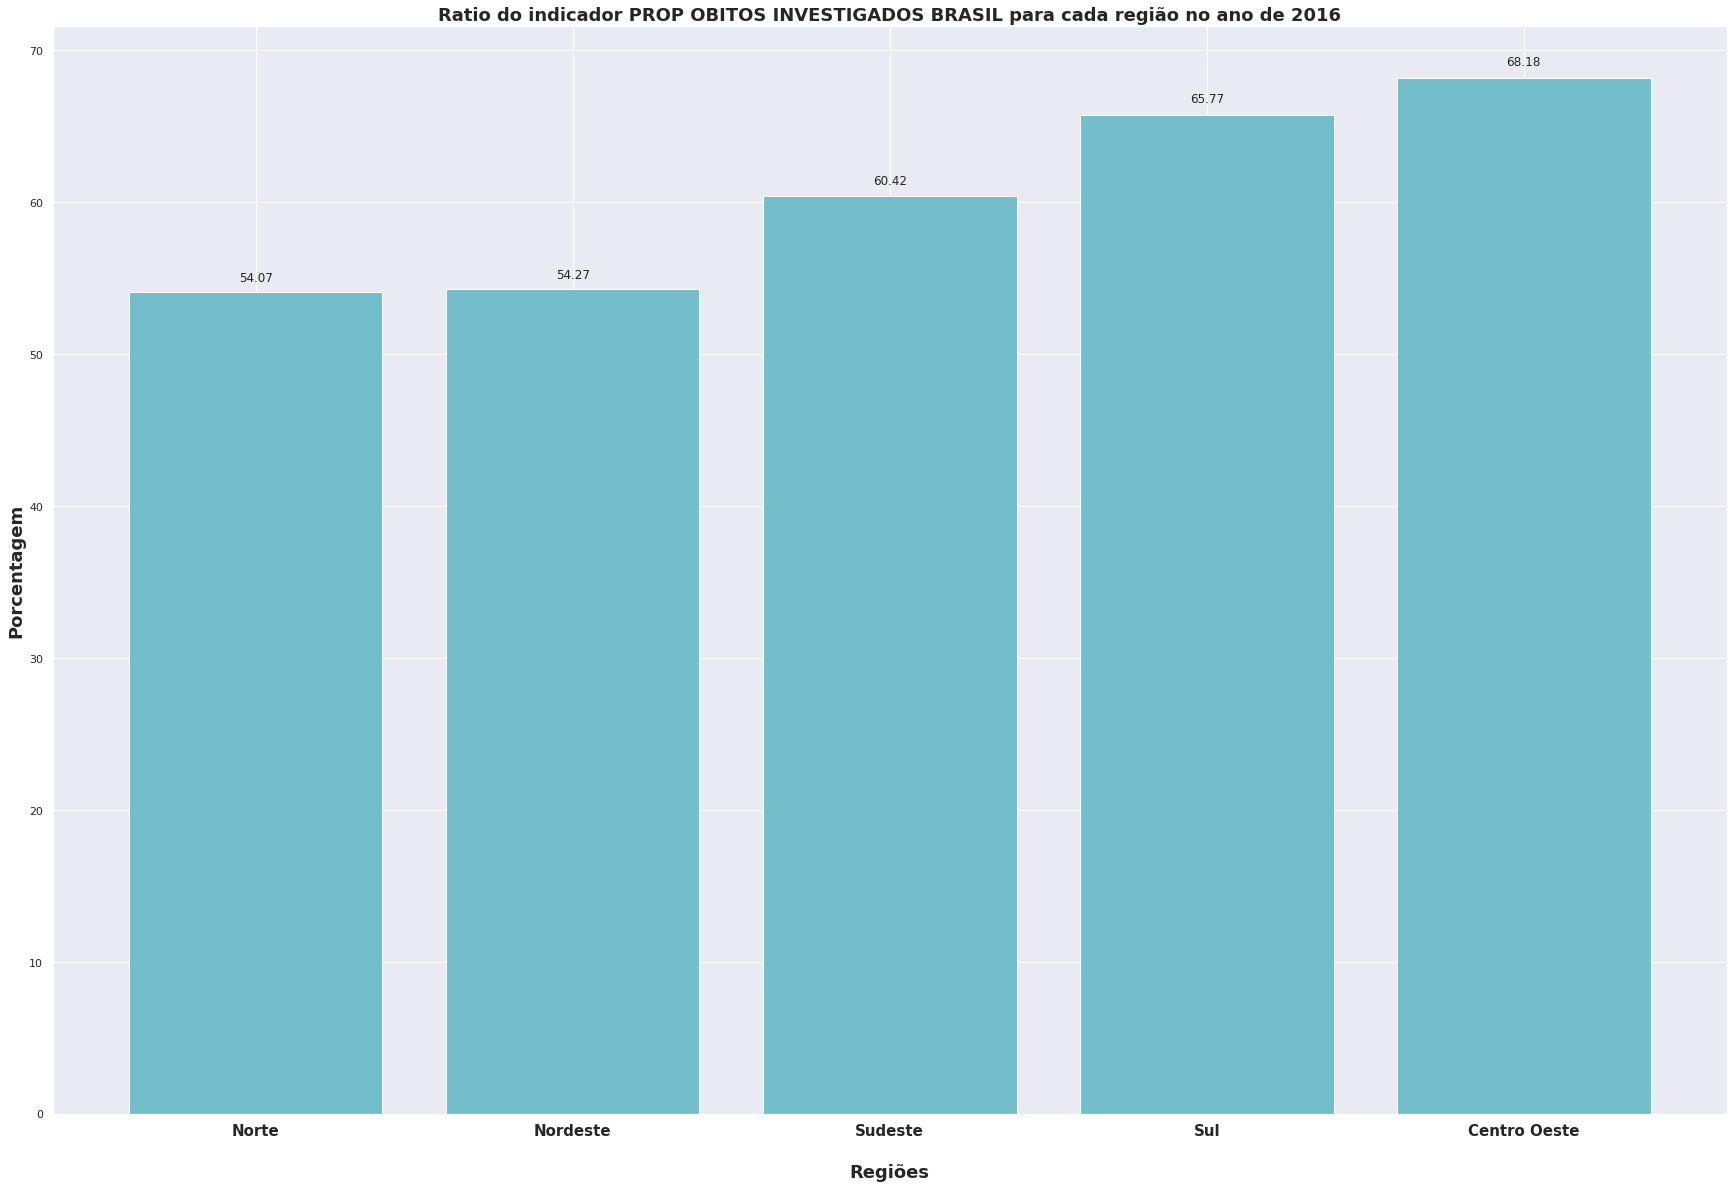

In [300]:
plt.figure(figsize=(30, 20))

aux = df_brasil_regiao[df_brasil_regiao[ano]==ano_esc]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 15}


plt.title("Ratio do indicador " + nome_indicador +" para cada região no ano de " + str(ano_esc),**font)
plt.xlabel('\nRegiões',**font)
plt.ylabel('Porcentagem',**font)

y_pos = range(5)
grafico = plt.bar(aux['NOMEREGIAO'],100*aux[ratio] , color ='#74BDCB')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, aux['NOMEREGIAO'], rotation=0,**font_label)

plt.savefig('./Imagens/10-grafico7', bbox_inches='tight')
plt.show()

# Refazer as médias

In [301]:
#Mediana e quartil 
df_para_data_selecionada = df_brasil_por_estado[df_brasil_por_estado[ano] ==  ano_esc]

Media_total = df_para_data_selecionada[total].mean()
Mediana_total = df_para_data_selecionada[total].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_total = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

Media_indicador = df_para_data_selecionada[indicador].mean()
Mediana_indicador = df_para_data_selecionada[indicador].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_indicador = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

#print(df_brasil_por_estado)
print()
print("Media estadual do número total de registros feitos nesse ano (" ,ano_esc,"), no Brasil: ", float(Media_total))
print("Mediana do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil: ", float(Mediana_total))
print("Quartis do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil:\n",Quartil_total)
#------------------------------------------------
print()
print("Media estadual do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ", float(Media_indicador))
print("Mediana do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil: ", float(Mediana_indicador))
print("Quartis do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil:\n",Quartil_indicador)
print()
print('Dataframe agrupado por estado no ano de ',ano_esc,'\n')
print(df_para_data_selecionada)


Media estadual do número total de registros feitos nesse ano ( 2016 ), no Brasil:  2482.5925925925926
Mediana do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:  1245.0
Quartis do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:
 0.25     459.5
0.50     709.0
0.75    1773.0
Name: Qtd_Obitos_Investigados, dtype: float64

Media estadual do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) no Brasil:  1477.5185185185185
Mediana do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) entre os estados do Brasil:  709.0
Quartis do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) entre os estados do Brasil:
 0.25     459.5
0.50     709.0
0.75    1773.0
Name: Qtd_Obitos_Investigados, dtype: float64

Dataframe agrupado por estado no ano de  2016 

     COD_UF   Ano  Qtd_Obitos_Investigados  Qtd_Total    

In [302]:
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no Brasil: ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ",  float(media_indicador_mun_pais))

NameError: name 'numero_municipios_pais' is not defined

In [303]:
#média de município do estado: numero total de registros em um ano no estado / numero total de municípios que foram contabilizados no estado
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_estado_acumulado[df_estado_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ",  float(media_indicador_mun_pais))


Media municipal do número de total de registros feito nesse ano ( 2016 ) no estado RIO DE JANEIRO :  72.8695652173913
Media municipal do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) no estado RIO DE JANEIRO :  433.6195652173913


In [304]:
# Médias regionais

## Describe por Estado

Dados do país inteiro considerando as proporções de cada estado (em todos os anos)

In [262]:
df_aux = df_brasil_por_estado[['COD_UF', 'Ratio']]
df_to_describe = df_aux.groupby(['COD_UF']).mean()
#df_to_describe.sort_values('Ratio',ascending=False)
aux = df_to_describe.describe()
df_to_describe['Ratio'].quantile([0.25,0.5,0.75])
aux

,Ratio
count,27.000000
mean,1.038126
std,0.508131
min,0.458553
25%,0.663029
50%,0.962927
75%,1.223806
max,2.651692


In [1861]:
df_to_describe

,Ratio
COD_UF,
11,0.697050
12,0.785376
13,0.847444
14,0.703706
15,0.891087
16,0.838350
17,0.829189
21,0.837696
22,0.818170


## Describe por Município

Dados do país inteiro considerando as proporções de cada município (em todos os anos)

In [1862]:
df_aux = subset_nao_ignorado[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
df_to_describe.describe()

,Ratio
count,5570.000000
mean,0.560016
std,0.299962
min,0.000000
25%,0.273966
50%,0.622585
75%,0.840240
max,0.989620


## Describe No Estado

Dados do estado escolhido (Rio de Janeiro) considerando as proporções de cada município (em todos os anos)


In [1863]:
df_aux = df_estado_municipios[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
descricao = df_to_describe.describe()
print(descricao)
print(descricao.at['25%','Ratio'])

#len_25 = len(df_estado_municipios[df_estado_municipios[ratio]<= ])

           Ratio
count  92.000000
mean    0.568746
std     0.122096
min     0.301044
25%     0.490306
50%     0.569489
75%     0.638572
max     0.838296
0.4903064131515108


## Gráfico de Pizza para visualizar a proporção de municípios e estados em cada quartil (vamos ver os quartis do país e do estado) além de indicar em qual quartil o município e estado escolhido se encontram

In [1864]:
# '330455'
df_to_describe

,Ratio
CODMUNRES,
330010,0.521980
330015,0.362003
330020,0.660029
330022,0.555678
330023,0.583531
330025,0.540441
330030,0.613840
330040,0.528183
330045,0.794408


In [1865]:
df_estado_municipios

,CODMUNRES,ano_nasc,Qtd_2ou4Racacor,Qtd_Total,Ratio
25495,330010,2012,1246,2698,0.461824
25496,330010,2013,1054,2653,0.397286
25497,330010,2014,1374,2838,0.484144
25498,330010,2015,1514,2872,0.527159
25499,330010,2016,1422,2628,0.541096
...,...,...,...,...,...
26226,330630,2015,1503,3439,0.437046
26227,330630,2016,1392,3364,0.413793
26228,330630,2017,1454,3272,0.444377
26229,330630,2018,1458,3376,0.431872


In [1866]:
len_25 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_50 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_75 = len(df_to_describe[df_to_describe[ratio]>= descricao.at['75%','Ratio']])

len_75

23